# ADA final exam

## Deadline
_Friday, January 19, 2018, at 19:15 CET_


## Important notes

* Don't forget to add a textual description of your thought process, the assumptions you made, and your results!
* Please write all your comments in English, and use meaningful variable names in your code.
* As we have seen during the semester, data science is all about multiple iterations on the same dataset. Do not obsess over small details in the beginning, and try to complete as many tasks as possible during the first 2 hours. Then, go back to the obtained results, write meaningful comments, and debug your code if you have found any glaring mistake.
* You cannot leave the room in the first and last 15 minutes.
* You can use all the online resources you want except for communication tools (emails, web chats, forums, phone, etc.). We will monitor the network for unusual activities.
* Remember, this is not a homework assignment -- no teamwork allowed!

## Submission
* Make sure you upload your iPython Notebook (1 file) with [this form](https://goo.gl/forms/JKPX74ZH707sB7Up1) at the end of the exam, with all the cells already evaluated (except for the Spark-related question 1.4).
* Complete all the fields in the form, and name your file following the format "NameSurname_sciper.ipynb". The form will be open to submissions until 19:20 (strict deadline). Late submissions will not be accepted.

# Design the Pokedex 2.0

![banner](images/dataset-cover.jpg)

Pokémon are small creatures that fight in competitions. All Pokémon have different numerical characteristics (strength of attack, defense, etc.) and belong to one or two so-called classes (water, fire, etc.).
[Professor Oak](https://www.pojo.com/cartoon/Oak.gif) is the inventor of the [Pokedex](https://en.wikipedia.org/wiki/Gameplay_of_Pok%C3%A9mon#Pok%C3%A9dex), a useful portable device that keeps information about all the Pokémon available. As his lead data scientist, you just received a request from him asking you to update the software on all Pokedex devices. In this exam, you will work toward improving the Pokedex by (1) exploring a dataset of Pokémon and the battles they fight, (2) developing a model for predicting the outcome of battles between Pokémon, and (3) devising a method for ranking Pokémon by their overall strength.

## Dataset description
Professor Oak has dumped the memory of one Pokedex device, resulting in the dataset you’ll work with in this exam.

### [pokemon.csv](pokemon.csv)

In this file, each row represents the features of one Pokémon.

* pid: Numeric - ID of the Pokémon
* HP: Numeric - Health points
* Attack: Numeric - Strength of the regular attack
* Defense: Numeric - Strength of the regular defense
* Sp. Atk: Numeric - Strength of the special attack
* Sp. Def: Numeric - Strength of the special defense
* Speed: Numeric - Moving speed
* Legendary: Boolean - ‘True’ if the Pokémon is rare
* Class 1: Categorical - Pokémon class
* Class 2: Categorical - Pokémon class

Please note that a Pokémon can have either one or two classes. If a Pokémon has two classes, they are both considered to have the same importance.

### [combats.csv](combats.csv)

In this file, each row represents the outcome of one battle between two Pokémon.

* First_pokemon: Numeric - ID (match with pid)
* Second_pokemon: Numeric - ID (match with pid)
* Winner: Numeric - ID of the winner

### Good luck!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1: Exploring the data - 30 points
In this part, you will explore the data to address the curiosities of the demanding Professor Oak.

1. (6 points) Explore the data and report some descriptive statistics (e.g., use df.describe(), report the number of classes, summarize the attack and defense distributions, etc.). This will be useful later in your analysis.
2. (4 points) Compare the probability distribution of the “regular attack” feature with that of the “regular defense” feature. In particular,
   1. visualize the relation between these two variables using an appropriate plot;
   2. list the names of the 3 Pokémon with highest attack-over-defense ratio;
   3. list the names of the 3 Pokémon with lowest attack-over-defense ratio;
   4. list the names of the 10 Pokémon with the largest number of victories.
3. (10 points) Professor Oak suspects that Pokémon in the _grass_ class have a stronger regular attack than those in the _rock_ class. Check if he is right and convince him of your conclusion with statistical arguments.
   Note: If there are Pokémon that are in both classes, discard them.
   Note: You may assume that the distribution of the regular attack feature is normal for all Pokémon classes.
4. (10 points) Professor Oak reveals to you that he has built a backdoor into every Pokedex in the world and that he is secretly dumping the memory of all devices to his servers. He expects to have the records of 1 billion combats soon, and one machine won’t be enough to handle all this data, so he wants you to use Spark. Your task: Solve problem 2iv above (“list the names of the 10 Pokémon with the largest number of victories”) with a Spark implementation in Python. The output should be a Python list with 10 names sorted in descending order of number of victories.
   Note: You don’t need to run the Spark code -- just list it! You should assume that you have two DataFrames (already loaded) called `pokemon` and `combats`, with the same schema as the small CSV files you’ve been working with above.

### 1 Descriptive statistics

In [2]:
pokemons = pd.read_csv('pokemon.csv', index_col=0)
print(pokemons.shape)
pokemons.head()

(800, 10)


,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
pid,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [3]:
pokemons.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


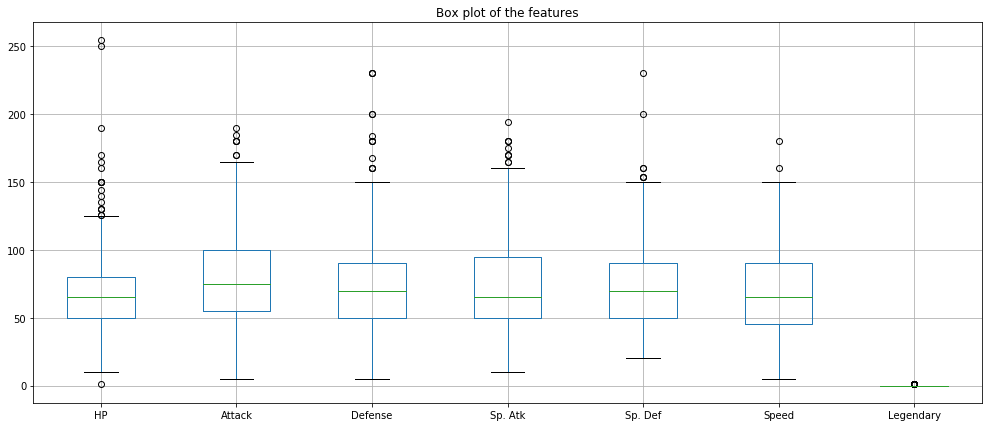

In [4]:
plt.figure(figsize=(17,7))
pokemons.boxplot()
plt.title("Box plot of the features")
plt.show()

We can see that all the distributions are right skwed with some outliers always in the huge values (except for HP which has one outlier in small values.

Let's analyse now the different classes of the pokemon :

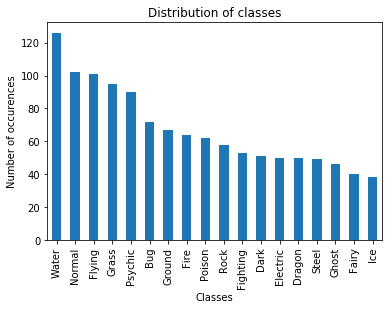

In [5]:
# We need to add the classes because class 1 and class 2 have the same importance
classes = pokemons['Class 1'].value_counts() + pokemons['Class 2'].value_counts()
classes = classes.sort_values(ascending=False)
plt.figure()
plt.title("Distribution of classes")
classes.plot(kind="bar")
plt.xlabel("Classes")
plt.ylabel("Number of occurences")
plt.show()

In [6]:
# Load combats
combats = pd.read_csv('combats.csv')
print(combats.shape)
combats.head()

(50000, 3)


,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


### 2 Compare probability distribution

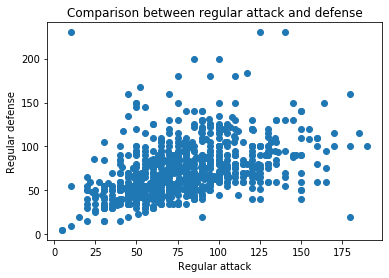

In [7]:
plt.figure()
plt.title("Comparison between regular attack and defense")
plt.scatter(pokemons.Attack, pokemons.Defense)
plt.xlabel("Regular attack")
plt.ylabel("Regular defense")
plt.show()

They seem to be correlated even if there are some outliers (some pokemons which have a good attack and bad defense or the other way around)

In [8]:
# Compute the attack over defense ratio
pokemons['AttackDefenseRatio'] = pokemons.Attack/pokemons.Defense
attack_over_defense = pokemons[['Name', 'AttackDefenseRatio']]
# Lowest Ratio
pokemons = pokemons.drop(columns="AttackDefenseRatio")
attack_over_defense.sort_values(by="AttackDefenseRatio")[:3]

,Name,AttackDefenseRatio
pid,,
231,Shuckle,0.043478
140,Magikarp,0.181818
485,Bronzor,0.279070


In [9]:
# Highest ratio
attack_over_defense.sort_values(by="AttackDefenseRatio", ascending=False)[:3]

,Name,AttackDefenseRatio
pid,,
430,DeoxysAttack Forme,9.00
348,Carvanha,4.50
20,Mega Beedrill,3.75


In [10]:
# List the 10 pokemons with the highest number of victory
vicoty_counts = pd.merge(pokemons.Name, combats.Winner.value_counts().rename('Number of victory'), left_index=True, right_index=True)
vicoty_counts.sort_values(by="Number of victory", ascending=False)[:10]

,Name,Number of victory
163,Mewtwo,152
154,Aerodactyl,136
438,Infernape,136
428,Jirachi,134
432,Deoxys Speed Forme,133
314,Slaking,133
214,Murkrow,130
394,Mega Absol,130
249,Mega Houndoom,128
155,Mega Aerodactyl,127


# 3 Statistical test 
We need to test :
* H0: mean of the regular attack of grass pokemon = mean of the regular attack of rock pokemon
* H1: mean of the regular attack of grass pokemon > mean of the regular attack of rock pokemon

We will use a one way t-test test to test that hypothesis. But we need to check the assumtion of the ANOVA test :
* The simples are independant : it's true because we discard pokemon in both class
* Each sample is from a normal distributed population : We assume it is true
* Homoscedasticity, the population standard deviations of the groups are all equal : we will test it using a Bartlett test

First we need to extract our samples (the list of regular attack strength of grass pokemons and rock pokemons)

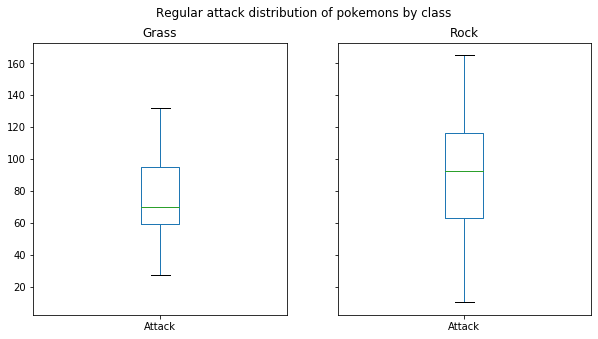

Mean of grass pokemon's attack : 73.73118279569893
Mean of rock pokemon's attack : 91.78571428571429


In [11]:
grass = pokemons[(pokemons['Class 1'] == "Grass") | (pokemons['Class 2'] == "Grass")]
rock = pokemons[(pokemons['Class 1'] == "Rock") | (pokemons['Class 2'] == "Rock")]

# Remove pokemons in both classes
indexes_both_classes = pd.merge(grass, rock, left_index=True, right_index=True).index
grass = grass.drop(index=indexes_both_classes)
rock = rock.drop(index=indexes_both_classes)

# Keep only attack
grass_attack = grass.Attack
rock_attack = rock.Attack

# we will first look at the distribution
fig, [ax1, ax2] = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
grass_attack.plot.box(ax=ax1)
ax1.set_title("Grass")
rock_attack.plot.box(ax=ax2)
ax2.set_title("Rock")
plt.suptitle("Regular attack distribution of pokemons by class")
plt.show()

print("Mean of grass pokemon's attack :",grass_attack.mean())
print("Mean of rock pokemon's attack :",rock_attack.mean())

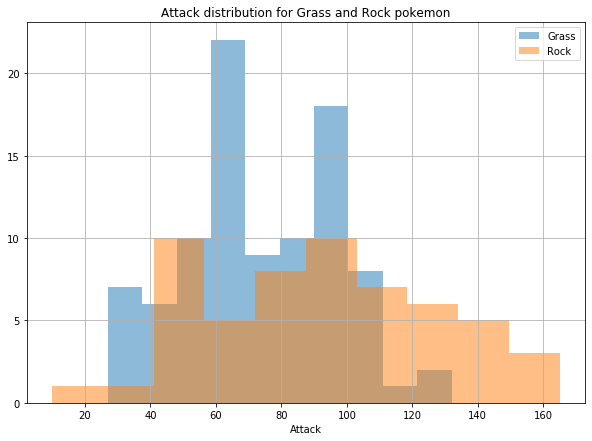

In [40]:
plt.figure(figsize=(10,7))
grass_attack.hist(alpha=0.5, label="Grass")
rock_attack.hist(alpha=0.5, label="Rock")
plt.legend()
plt.title("Attack distribution for Grass and Rock pokemon")
plt.xlabel('Attack')
plt.show()

In [12]:
# Bartlett test
from scipy.stats import bartlett
T, pvalue = bartlett(grass_attack, rock_attack)
pvalue

0.0021260122537075767

The variance are not the same we need to add that information in out test

In [13]:
from statsmodels.stats.weightstats import ttest_ind
ttest_ind(grass_attack, rock_attack, alternative='larger', usevar='unequal')

(-3.4169379582521517, 0.9995179726543227, 87.20927633661556)

The p value is 0.999 it means that we cannot reject the null hypothesis. We cannot conclude anything from that test. We will test the other way around. If the mean of reg attack of rock pokemon are hiegher than for grass pokemon.

In [14]:
ttest_ind(grass_attack, rock_attack, alternative='smaller', usevar='unequal')

(-3.4169379582521517, 0.00048202734567726453, 87.20927633661556)

Here we obtained a p value of 0.0005 < 0.05. Then we can conclude that the rock pokemon have a higher attack on average than grass pokemon.

### 4 Spark

In [15]:
if False:
    number_victory = combats.groupBy("Winner").agg(count("*").alias("Number of victory"))
    number_victory = number_victory.join(pokemon, number_victory.pid == pokemon.pid)
    number_victory = number_victory.sort(desc("Number of victory")).limit(10)
    number_victory.select(['Name', 'Number of victory']).show()

## Question 2: Prediction - 40 points
Now that you know what your data looks like, you are ready to implement the prediction model for the Pokedex 2.0. The model should take as input the features of two Pokémon and generate a binary value to predict who will win.

1. (3 points) Generate the feature vectors and the labels to train your model.
2. (5 points) How does your model handle categorical features and Pokémon with multiple classes?
3. (10 points) Train a random forest to predict the winner of a match based on the available features. To do so, split the full dataset randomly into a training set (90%) and a testing set (10%), and try different values of the number of estimators (`n_estimators`, try values 10, 25, 50, 100) and the maximum tree depth (`max_depth`, try values 2, 4, 10). Do this manually, without using any scikit-learn helpers.
4. (5 points) Summarize and describe the results you obtain when training on 90% and testing on 10% of the data. What is the best combination of the two hyperparameters (number of estimators and maximum tree depth)?
5. (5 points) Could the above training/testing setup potentially lead to wrong conclusions regarding the best hyperparameter setting? If so, describe why, and how you would address the problem. (Hint: think about how you’re making use of the data during training and testing).
6. (7 points) Implement your solution to the problem you’ve identified in the previous subquestion (5), and show and describe your results.
7. (5 points) Finally, Professor Oak wants to know what the most predictive features are. Plot feature importance as a bar plot representing the 10 most predictive variables.

### 1 - 2 generates feature vector

In [16]:
# Create a new df for training
pokemons_predict = pokemons.copy()
# Drop the name of the pokemon
pokemons_predict = pokemons_predict.drop(columns="Name")

# Handle class
classes = pokemons_predict[['Class 1', 'Class 2']]
classes = classes.stack().str.get_dummies().sum(level=0)
pokemons_predict[classes.columns] = classes
pokemons_predict = pokemons_predict.drop(columns=['Class 1', 'Class 2'])

# Transform legendary into 0/1
pokemons_predict.Legendary = pokemons_predict.Legendary.astype('int')

pokemons_predict.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Bug,Dark,Dragon,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
pid,,,,,,,,,,,,,,,,,,,,,
1,45,49,49,65,65,45,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,60,62,63,80,80,60,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,80,82,83,100,100,80,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,80,100,123,122,120,80,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
5,39,52,43,60,50,65,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Merge information from previous DF with the combat DF
detailed_combats = pd.merge(combats, pokemons_predict, left_on="First_pokemon", right_index=True)
detailed_combats = pd.merge(detailed_combats, pokemons_predict, left_on="Second_pokemon", right_index=True, suffixes=('_First', '_Second'))
# Set the winner to 0 if First pokemon wins and 1 if second pokemons wins
detailed_combats.Winner = (detailed_combats.Winner == detailed_combats.Second_pokemon).astype('int')
detailed_combats

,First_pokemon,Second_pokemon,Winner,HP_First,Attack_First,Defense_First,Sp. Atk_First,Sp. Def_First,Speed_First,Legendary_First,...,Ghost_Second,Grass_Second,Ground_Second,Ice_Second,Normal_Second,Poison_Second,Psychic_Second,Rock_Second,Steel_Second,Water_Second
0,266,298,1,50,64,50,45,50,41,0,...,0,1,0,0,0,0,0,0,0,0
14235,73,298,1,70,80,50,35,35,35,0,...,0,1,0,0,0,0,0,0,0,0
21465,373,298,1,110,78,73,76,71,60,0,...,0,1,0,0,0,0,0,0,0,0
31953,536,298,0,50,65,107,105,107,86,0,...,0,1,0,0,0,0,0,0,0,0
40327,368,298,0,73,115,60,60,60,90,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5472,733,510,1,38,35,40,27,25,35,0,...,0,1,0,1,0,0,0,0,0,0
44424,204,510,0,55,45,50,45,65,80,0,...,0,1,0,1,0,0,0,0,0,0
33351,544,510,0,110,160,110,80,110,100,1,...,0,1,0,1,0,0,0,0,0,0
21945,320,510,0,104,91,63,91,73,68,0,...,0,1,0,1,0,0,0,0,0,0


In [18]:
# Look at the proportion of winning matches
len(detailed_combats[detailed_combats.Winner == 1])/len(detailed_combats)

0.52798

The two classes are equally distributed so the accuracty is a good metric

### Parameter tuning

In [19]:
# Split into a training and testing set
training = detailed_combats.sample(frac=0.9)
testing = detailed_combats.drop(index=training.index)
X_train = training.drop(columns=['First_pokemon', 'Second_pokemon', 'Winner'])
y_train = training['Winner']
X_test = testing.drop(columns=['First_pokemon', 'Second_pokemon', 'Winner'])
y_test = testing['Winner']

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

accuracies = np.zeros((4, 3))
for i, n_estimators in enumerate([10, 25, 50, 100]):
    for j, max_depth in enumerate([2, 4, 10]):
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies[i, j] = accuracy_score(y_test, y_pred)

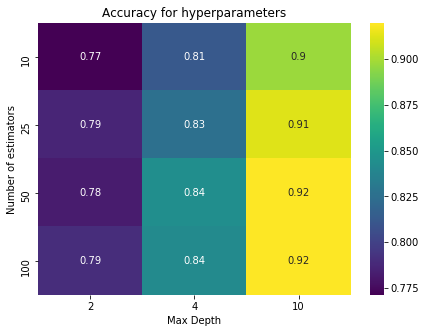

In [21]:
import seaborn as sb

fig, ax = plt.subplots()
fig.set_size_inches(7,5)

ax = sb.heatmap(accuracies,annot=True,cmap='viridis')

# Bugfix to show whole first and last row
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Set labels
ax.set_xticklabels([2, 4, 10])
ax.set_yticklabels([10, 25, 50, 100])

plt.title("Accuracy for hyperparameters")
plt.xlabel("Max Depth")
plt.ylabel("Number of estimators")
plt.show()

### 4 Conclusion about parameters

We obtained an max accuracy of 92%. The best combination is with a max depth = 10 and a number of estimators = to 50 or 100 (we will select 100).

### 5 Problem
Yes we use the same testing set to select our parameters and asset the performance of our model. One better way to do it is to split into a training, validation and testing set. Use the validation set to select our parameters and then use the test set to asset the performance of our model.

### 6 Implementation of the validation set approach

In [22]:
# Split into a training and testing set
training = detailed_combats.sample(frac=0.8)
validation_testing = detailed_combats.drop(index=training.index)
validation = validation_testing.sample(frac=0.5)
testing = validation_testing.drop(index=validation.index)
X_train = training.drop(columns=['First_pokemon', 'Second_pokemon', 'Winner'])
y_train = training['Winner']
X_valid = validation.drop(columns=['First_pokemon', 'Second_pokemon', 'Winner'])
y_valid = validation['Winner']
X_test = testing.drop(columns=['First_pokemon', 'Second_pokemon', 'Winner'])
y_test = testing['Winner']

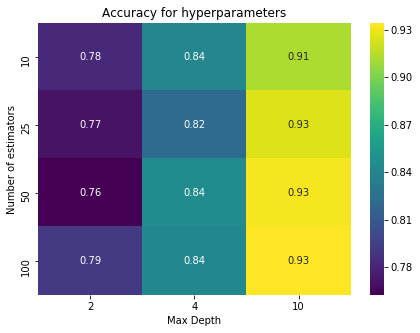

In [30]:
# Tune hyper parameters
accuracies = np.zeros((4, 3))
for i, n_estimators in enumerate([10, 25, 50, 100]):
    for j, max_depth in enumerate([2, 4, 10]):
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_valid)
        accuracies[i, j] = accuracy_score(y_valid, y_pred)
        
fig, ax = plt.subplots()
fig.set_size_inches(7,5)

ax = sb.heatmap(accuracies,annot=True, cmap='viridis')

# Bugfix to show whole first and last row
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax.set_xticklabels([2, 4, 10])
ax.set_yticklabels([10, 25, 50, 100])

plt.title("Accuracy for hyperparameters")
plt.xlabel("Max Depth")
plt.ylabel("Number of estimators")
plt.show()

In [31]:
# Train the model with the training and validation set
training = training.append(validation)
X_train = X_train = training.drop(columns=['First_pokemon', 'Second_pokemon', 'Winner'])
y_train = training['Winner']

model = RandomForestClassifier(n_estimators=100, max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy is :",accuracy_score(y_test, y_pred))

Accuracy is : 0.9172


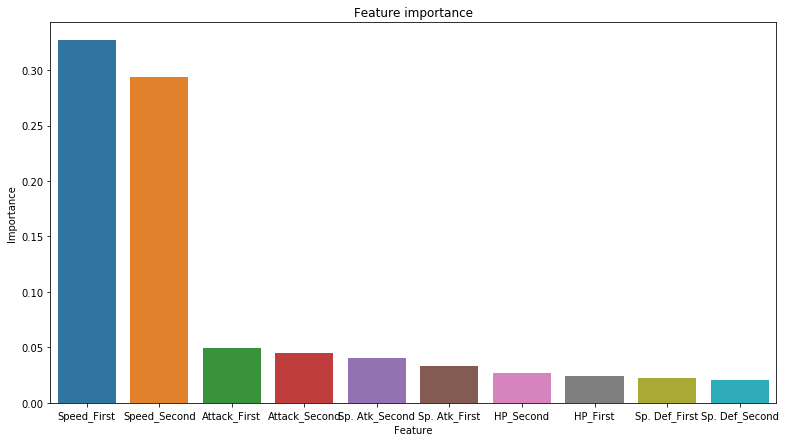

In [45]:
features = model.feature_importances_
zipped = zip(X_train.columns, features)
sorted_features = sorted(zipped, key=lambda x: x[1])
best_features = sorted_features[::-1][:10]

plt.figure(figsize=(13, 7))
sb.barplot(x=[x[0] for x in best_features], y=[x[1] for x in best_features])
plt.title("Feature importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

## Question 3: Ranking - 30 points
Something the new Pokedex is missing is a smart way of ranking the Pokémon. As the dataset Professor Oak gave you contains the outcome of a large number of battles, the idea is to use this data to come up with a way of sorting the Pokémon from strongest to weakest.
1. (5 points) Compute the winning ratio (number of wins divided by number of battles) for all Pokémon. Show the 10 Pokémon with the highest ratio and describe what they have in common with respect to their features. Discuss your results about feature importance from question 2.7 (regarding feature importance) in this context.

Pokémon tournaments can be represented as a so-called _dominance graph_. The dominance graph is a directed graph in which each Pokémon is represented by one vertex, and directed edges point from stronger to weaker Pokémons: in particular, if Pokémon _i_ has won a strictly larger number of times against Pokémon _j_ than _j_ has won against _i_ (that is, if _i_ dominates _j_), there is a directed edge pointing from node _i_ to node _j_. The dominance graph can be represented as an adjacency matrix _G_ where entry _G_<sub>_ij_</sub> is 1 if there is an edge pointing from _i_ to _j_, and 0 otherwise.

2. (10 points) A simple method for identifying the strongest Pokémon using this graph is to compute the matrix _A_ = _G_ + _G_<sup>2</sup>. Consider a given row of _A_; summing up all elements of that row results in a dominance score for the respective Pokémon. Explain what this score represents and why it may be interpreted as capturing the dominance of a Pokémon.
3. (7 points) Compute _A_ and extract the 10 Pokémon with the highest dominance score.
4. (3 points) Compare the ranking by dominance scores with the ranking by winning ratio (cf. subquestion 1 above). What do you observe? How do you explain the differences (if any)?
5. (5 points) Professor Oak is really keen on featuring a solid ranking mechanism in the new Pokedex, so you need to make a decision: Which scoring method is better, that based on winning ratio or that based on dominance scores? Support your opinion with explanations and examples.

### Winning ratio ranking

In [26]:
victory = combats['Winner'].value_counts()
number_combats = combats['First_pokemon'].value_counts() + combats['Second_pokemon'].value_counts()
pokemons['Winning ratio'] = victory/number_combats
best_winning_ratio = pokemons.sort_values(by='Winning ratio', ascending=False).head(10)
best_winning_ratio

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Winning ratio
pid,,,,,,,,,,,
155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,False,0.984496
513,Weavile,Dark,Ice,70,120,65,45,85,125,False,0.974790
704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,True,0.968000
20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False,0.966387
154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,False,0.964539
477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False,0.961240
727,Greninja,Water,Dark,72,95,67,103,71,122,False,0.960630
717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,False,0.959350
165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,True,0.952000


They are all in the 25% pokemon with the highest speed (with respect to the description stats computed in question 1. They have also an attack which is highly higher than the mean of pokemons. these feature are indeed the two most important feature of the random forst classifier.

In [27]:
NB_POKEMONS = len(pokemons)
combats_matrix = np.zeros((NB_POKEMONS, NB_POKEMONS))

for _, (i, j, winner) in combats.iterrows():
    if winner == i:
        combats_matrix[i-1, j-1] += 1
    else:
        combats_matrix[j-1, i-1] += 1

In [28]:
def map_edges(wins_i, wins_j):
    if wins_i == wins_j:
        return 0,0
    elif wins_i > wins_j:
        return 1,0
    else:
        return 0,1

dominant_adj = np.zeros((NB_POKEMONS, NB_POKEMONS))
for i in range(NB_POKEMONS):
    for j in range(i+1, NB_POKEMONS):
        dominant_adj[i,j], dominant_adj[j,i] = map_edges(combats_matrix[i,j], combats_matrix[j,i])

In [29]:
A = dominant_adj + np.linalg.matrix_power(dominant_adj, 2)
dominant_score = pd.Series(np.sum(A, axis=1))
dominant_score.index = dominant_score.index + 1
dominants = pd.merge(pokemons, dominant_score.rename('Dominant Score'), left_index=True, right_index=True)
dominants.sort_values(by="Dominant Score", ascending=False)[:10]

,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Winning ratio,Dominant Score
pid,,,,,,,,,,,,
163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True,0.926829,8192.0
432,Deoxys Speed Forme,Psychic,NaN,50,95,90,95,90,180,True,0.917241,7885.0
154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,False,0.964539,7531.0
147,Jolteon,Electric,NaN,65,65,60,110,95,130,False,0.925373,7334.0
427,Mega Rayquaza,Dragon,Flying,105,180,100,180,100,115,True,0.947761,7075.0
430,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,True,0.902985,7015.0
249,Mega Houndoom,Dark,Fire,75,90,90,140,90,115,False,0.948148,7007.0
155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,False,0.984496,6971.0
394,Mega Absol,Dark,NaN,65,150,60,115,60,115,False,0.935252,6939.0


It's better to choose the network approach. The ratio approach is biased if the pokemon has only fight against weaker pokemon. Where the network rank take also into consideration the domination of pokemons you dominate.